In [30]:
one_hole_path = '/Users/yu/Downloads/one_hole_data.csv'

In [31]:
vibration_data1 = []
vibration_data2 = []
vibration_data3 = []

In [32]:
with open(one_hole_path) as fs1:
  for line in fs1:
    data_array = line.split(' ')
    vibration_data1.append(data_array[3:2504])
    vibration_data2.append(data_array[2504:5005])
    vibration_data3.append(data_array[5005:-1])

In [33]:
import numpy as np
import matplotlib.pyplot as plt
example = np.array(vibration_data2[0], dtype=float)

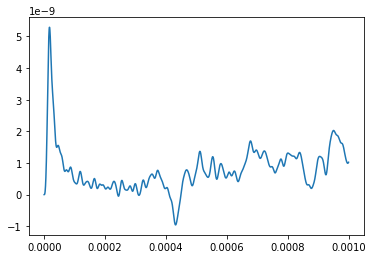

In [34]:
x = range(len(example))
time_list = []
for h in range(len(x)):
    time_list.append(h*0.0000004)
plt.plot(time_list,example)
plt.show()

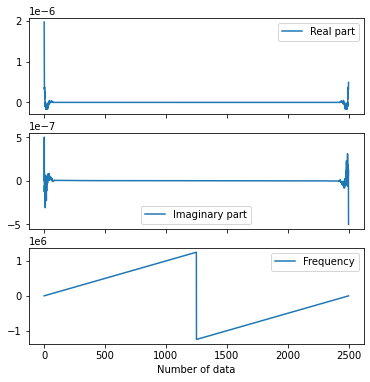

In [53]:
delta_t = 0.0000004
F = np.fft.fft(example) # 変換結果
freq = np.fft.fftfreq(len(example), d=delta_t) # 周波数
fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(6,6))
ax[0].plot(F.real, label="Real part")
ax[0].legend()
ax[1].plot(F.imag, label="Imaginary part")
ax[1].legend()
ax[2].plot(freq, label="Frequency")
ax[2].legend()
ax[2].set_xlabel("Number of data")
plt.show()

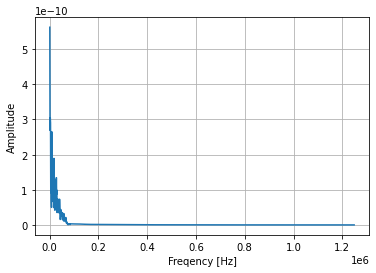

In [68]:
N = len(example)
Amp = np.abs(F/(N/2)) # 振幅

fig, ax = plt.subplots()
ax.plot(freq[1:int(N/2)], Amp[1:int(N/2)])
ax.set_xlabel("Freqency [Hz]")
ax.set_ylabel("Amplitude")
ax.grid()
plt.show()

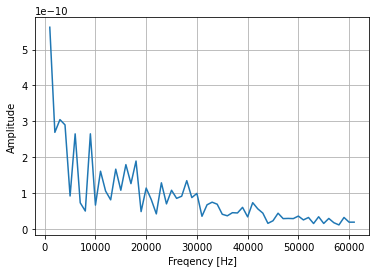

In [65]:
N = len(example)
Amp = np.abs(F/(N/2)) # 振幅

fig, ax = plt.subplots()
ax.plot(freq[1:int(N/2/20)], Amp[1:int(N/2/20)])
ax.set_xlabel("Freqency [Hz]")
ax.set_ylabel("Amplitude")
ax.grid()
plt.show()

In [57]:
from scipy import signal
maxid = signal.argrelmax(Amp[1:int(N/2/20)], order=1) #最大値

In [66]:
rep_index = maxid[0]
print(rep_index)

[ 2  5  8 10 13 15 17 19 22 24 27 29 32 36 38 40 45 47 49 51 53 55 58]


In [67]:
for h in range(len(rep_index)):
    print(freq[1:int(N/2/20)][rep_index[h]])

2998.8004798080765
5997.600959616153
8996.40143942423
10995.601759296282
13994.402239104358
15993.602558976409
17992.80287884846
19992.00319872051
22990.803678528588
24990.00399840064
27988.804478208716
29988.004798080765
32986.805277888845
36985.20591763294
38984.406237505
40983.60655737705
45981.607357057175
47980.807676929224
49980.00799680128
51979.20831667333
53978.40863654538
55977.60895641743
58976.409436225505


In [64]:
print(N)

2501
